In [2]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

In [9]:
data=pd.read_csv("Downloads/adidas.csv")
print(data)
#The dataset contains two columns; Time Period and Revenue. 
#The Time Period column contains the quarterly revenue of Adidas from 2000 to 2021, 
#and the Revenue column contains the sales revenue in millions (euros)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


In [13]:
!pip install plotly

In [31]:
import plotly.express as px
figure = px.line(data, x="Time Period", 
                 y="Revenue", 
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

<Figure size 432x288 with 0 Axes>

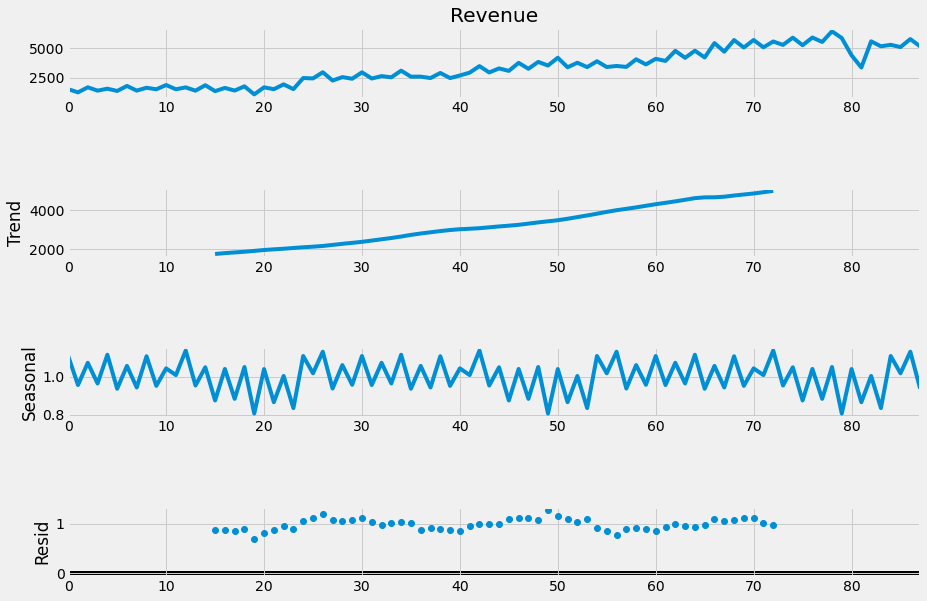

In [32]:
result = seasonal_decompose(data["Revenue"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)
#The sales revenue data of Adidas is seasonal as the quarterly revenue increases and decreases every quarter.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

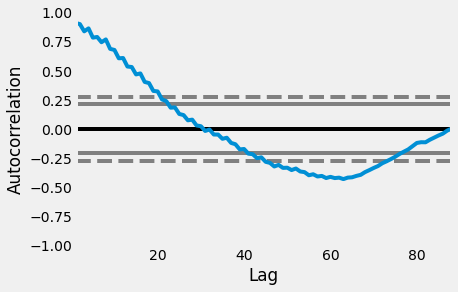

In [19]:
#I used the Seasonal ARIMA (SARIMA) model to forecast the quarterly sales revenue of Adidas.
pd.plotting.autocorrelation_plot(data["Revenue"])

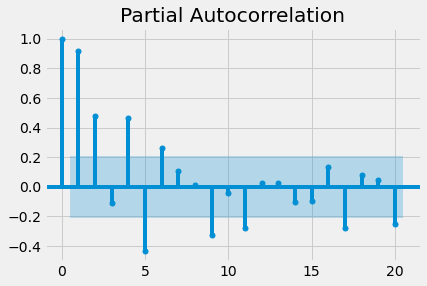

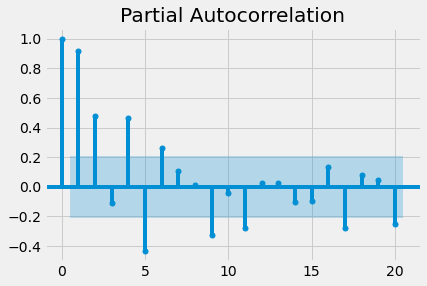

In [20]:
plot_pacf(data["Revenue"], lags = 20)

In [24]:
p=5
d=1
q=2
model=sm.tsa.statespace.SARIMAX(data['Revenue'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\Nikhil Scaria\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.520
Date:                            Tue, 27 Sep 2022   AIC                           1127.041
Time:                                    14:49:16   BIC                           1161.803
Sample:                                         0   HQIC                          1140.921
                                             - 88                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5794      0.389     -4.063      0.000      -2.341      -0.818
ar.L2         -1.4320      0.584   

In [27]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

88    6078.936891
89    5186.316745
90    6293.231831
91    5752.014718
92    5911.940468
93    5499.681422
94    6389.686666
95    5728.801655
Name: predicted_mean, dtype: float64


<AxesSubplot:>

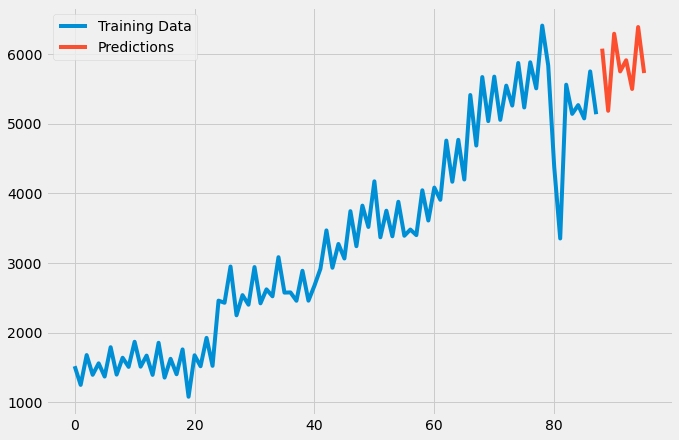

In [29]:
data["Revenue"].plot(legend=True, 
                     label="Training Data", 
                     figsize=(10, 7))
predictions.plot(legend=True, label="Predictions")